In [112]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=24, family='serif')
plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use('tableau-colorblind10')

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_fcbai_learner import ExpGap, LilUCBHeuristic, TrackAndStop, BatchRacing, BatchTrackAndStop
from banditpylib.utils import argmax_or_min_tuple, argmax_or_min, argmax_or_min_tuple_second

In [113]:
batch_sizes = [4, 8, 32]
rhos = [0.5, 10, 100, 1000]
# {
# "m1": [0.7, 0.4, 0.1],
# "m2": [0.9, 0.7, 0.4, 0.1],
# "m3": [0.9, 0.7, 0.5, 0.4, 0.45, 0.4, 0.3, 0.2]
# }
_means = ["m1", "m2", "m3"]#

In [94]:
confidence = 0.99
means =  [0.7, 0.4, 0.1]
max_pulls=50000
std=1
batch_size=8
rho=2.0/3.0
gamma = 1e3
switches = [0, 1, 2]
num_switches = 0
switches = [1, 2, 4]


# for num_switches in switches:
#     # for rho in rhos:
#     arms = [GaussianArm(mu=mean, std=std) for mean in means]
#     bandit = MultiArmedBandit(arms=arms)
#     learners = [
#                 #ExpGap(arm_num=len(arms), confidence=confidence, threshold=3,  name='Exponential-Gap Elimination'),
#     #             BatchRacing(arm_num=len(arms), confidence=confidence, max_pulls=max_pulls, 
#     #                             k=1, b=batch_size, r=int(batch_size/2), name='BatchRacing'),

#                 LilUCBHeuristic(arm_num=len(arms), confidence=confidence, max_pulls=max_pulls, name='Heuristic lilUCB'),
#                 TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="C", 
#                             max_pulls=max_pulls,  name='Track and stop C-Tracking'),
#                 BatchTrackAndStop(arm_num=len(arms), num_switches=num_switches, confidence=confidence, batch_size=batch_size, rho=rho, tracking_rule="C", 
#                              max_pulls=max_pulls,  name='Batch Track and stop C-Tracking')
#     #             TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="D", 
#     #                         max_pulls=max_pulls,  name='Track and stop D-Tracking')

#                ]

#     # For each setup, we run 20 trials
#     trials = 5
#     temp_file = tempfile.NamedTemporaryFile()

#     game = SinglePlayerProtocol(bandit=bandit, learners=learners)
#     # Start playing the game
#     # Add `debug=True` for debugging purpose
#     game.play(trials=trials, output_filename=temp_file.name)

#     trials_df = trials_to_dataframe(temp_file.name)
#     trials_df.to_csv("csv_files/trial_df_rho_" + str(rho) + "_num_switches_" + str(num_switches) + "_.csv", index=False)  # `index=False` ensures that the index is not saved in the CSV.

In [95]:
import pickle
with open('csv_files/data_gamma_1e-09_batch_size_8.pkl', 'rb') as file:
    loaded_list = pickle.load(file)
# Plot
# Hinge Loss
plt.plot(list(range(len(loaded_list))), loaded_list, label='Sparsity')
plt.xlabel('horizon')
plt.ylabel('Sparsity')
plt.legend()
plt.grid(True)

FileNotFoundError: [Errno 2] No such file or directory: 'csv_files/data_gamma_1e-09_batch_size_8.pkl'

In [116]:
1 - ((1 + 1) / 8)

0.75

In [125]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Initialize an empty DataFrame to hold all the lists
master_df = pd.DataFrame()

# Iterate over each .pkl file in the directory
for filename in os.listdir("csv_files"):
    if filename.startswith("data_gamma_"):
    #if '2023-09-08_.pkl' in filename:
        # Parse num_switches, gamma and batch_size from filename
        num_switches = int(filename.split("num_switches_")[1].split("_")[0])
        gamma = float(filename.split("data_gamma_")[1].split("_batch")[0])
        batch_size = int(filename.split("batch_size_")[1].split("num")[0])
        
        # Load the pkl file into a Python list
        with open(os.path.join("csv_files", filename), "rb") as file:
            data_list = pickle.load(file)

        # Convert the list to a DataFrame
        temp_df = pd.DataFrame(data_list, columns=["Data"])
        
        # Add new columns to the DataFrame to store num_switches, gamma and batch_size
        temp_df["num_switches"] = num_switches
        temp_df["gamma"] = gamma
        temp_df["batch_size"] = batch_size

        # Concatenate the temp_df into master_df
        master_df = pd.concat([master_df, temp_df], ignore_index=True)

No data found for num_switches=7, gamma=0.0001, batch_size=8
No data found for num_switches=6, gamma=0.0001, batch_size=8


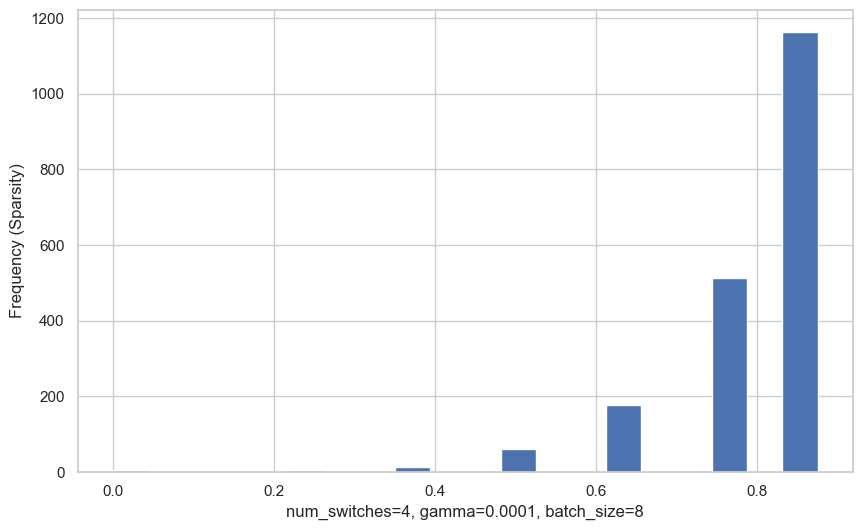

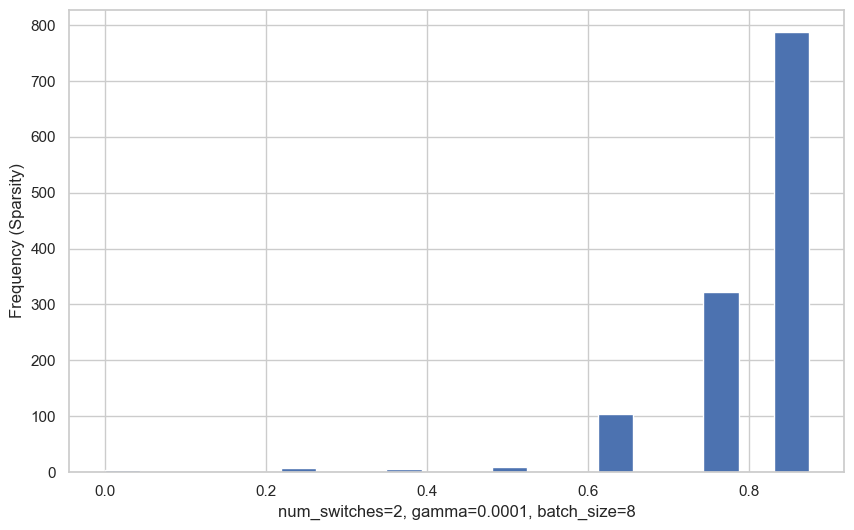

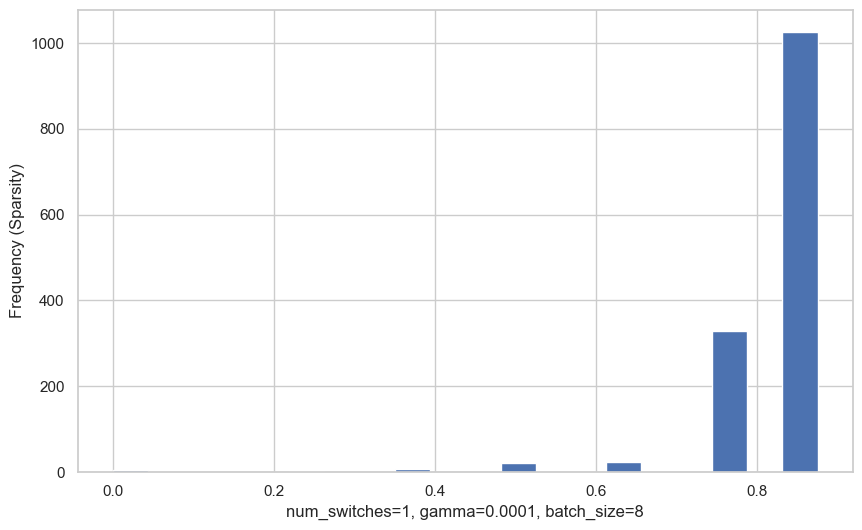

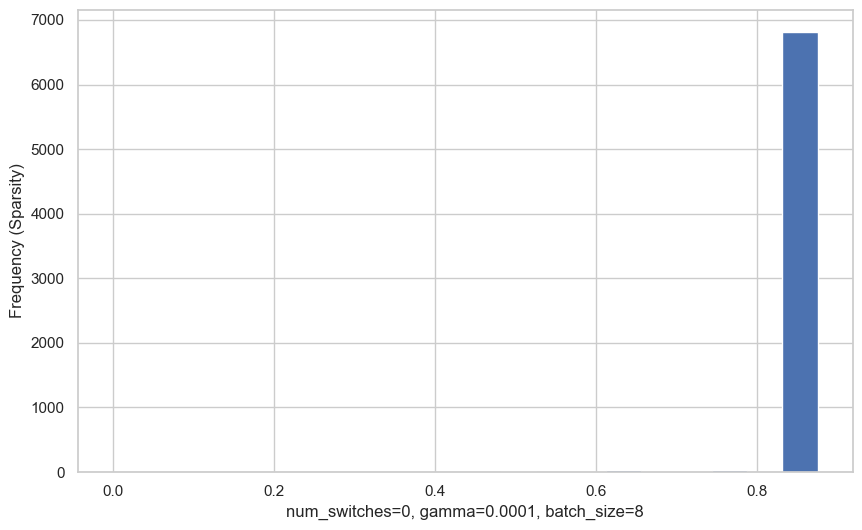

In [126]:
# Define specific combinations of num_switches, gamma, and batch_size to plot
#[1e-15, 1e-11, 1e-9, 1e-7, 1e-5, 1e0]
specific_combinations = [
    
    {"num_switches": 7, "gamma": 1e-04, "batch_size": 8},
    {"num_switches": 6, "gamma": 1e-04, "batch_size": 8},
    {"num_switches": 4, "gamma": 1e-04, "batch_size": 8},
    {"num_switches": 2, "gamma": 1e-04, "batch_size": 8},
    {"num_switches": 1, "gamma": 1e-04, "batch_size": 8},
    {"num_switches": 0, "gamma": 1e-04, "batch_size": 8},
    
]

# Plotting histograms for each specified combination
for comb in specific_combinations:
    subset = master_df[(master_df["num_switches"] == comb["num_switches"]) & 
                       (master_df["gamma"] == comb["gamma"]) & 
                       (master_df["batch_size"] == comb["batch_size"])]
    
    if not subset.empty:
        plt.figure()
        plt.hist(subset["Data"], bins=20)
        #plt.title(f"Histogram for num_switches={comb['num_switches']}, gamma={comb['gamma']}, batch_size={comb['batch_size']}")
        plt.xlabel(f"num_switches={comb['num_switches']}, gamma={comb['gamma']}, batch_size={comb['batch_size']}")
        plt.ylabel("Frequency (Sparsity)")
        plt.show()
    else:
        print(f"No data found for num_switches={comb['num_switches']}, gamma={comb['gamma']}, batch_size={comb['batch_size']}")


In [123]:
trials = 20
confidence = 0.99
means =  [0.9, 0.7, 0.5, 0.46, 0.45, 0.454, 0.453, 0.4]#, 0.33, 0.32, 0.3, 0.25, 0.24, 0.2]
max_pulls=50000
std=1
batch_size=8
gamma = 1e-4
gammas =  [1e-7, 1e-3]
num_switches = 7

df = pd.DataFrame({})
#for gamma in gammas:
switches = [4, 1,2,  0]
for num_switches in switches:
    trials_df = pd.read_csv("csv_files/trial_df_gamma_" + str(gamma)+ "_num_switches_" + str(num_switches) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['num_switches'] = num_switches
    trials_df['gamma'] =gamma
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_14402/1120306015.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_14402/1120306015.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_14402/1120306015.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_14402/1120306015.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,rounds,total_actions,regret,other,bandit,learner,confidence,num_switches,gamma,batch_size
19,2598,2605,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.99,0,0.0001,8
20,2864,2871,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.99,0,0.0001,8
21,235,1880,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,0,0.0001,8
22,400,3200,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,0,0.0001,8
23,6250,50000,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,0,0.0001,8


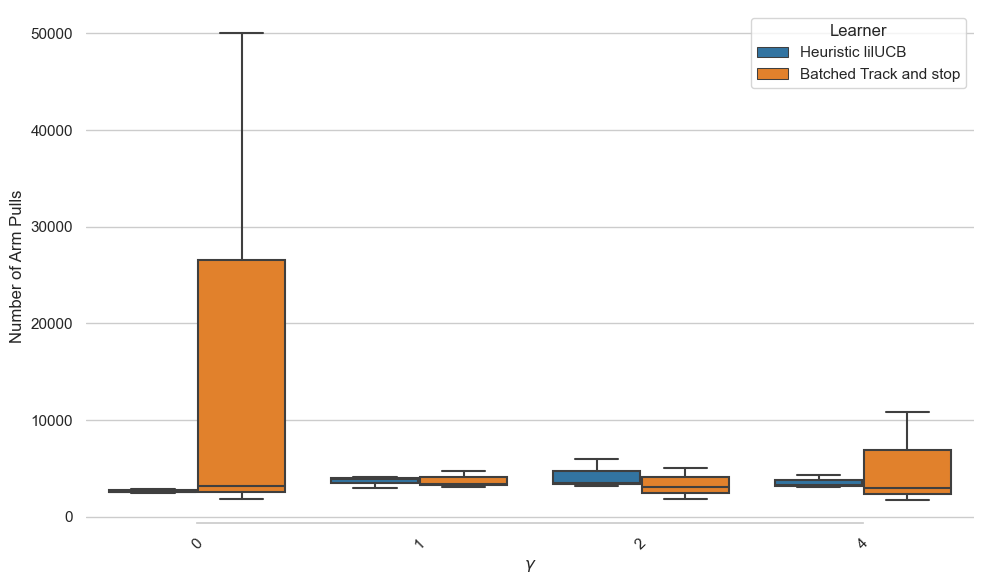

In [124]:
# Set a custom color palette for the plot
custom_palette = sns.color_palette("tab10")

# Create a box plot with improved formatting
plt.figure(figsize=(10, 6))
plt.rc('font', size=24, family='serif')
sns.set(style="whitegrid")  # Use a white grid background
sns.boxplot(x='num_switches', y='total_actions', hue='learner', data=df, palette=custom_palette)
#plt.title('Box Plot of Total Actions by Gamma and Learner')
plt.xlabel(r'$\gamma$')
plt.ylabel('Number of Arm Pulls')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Learner', loc='upper right')
sns.despine(trim=True, left=True)  # Remove unnecessary spines
plt.tight_layout()  # Ensure all elements are within the plot area
plt.show()

In [33]:
# game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# # Start playing the game
# # Add `debug=True` for debugging purpose
# game.play(trials=trials, output_filename=temp_file.name)
rhos= [0, 1e1, 1e3, 1e5]
gamma= 1e3#, 1e3, 1e5]
df = pd.DataFrame({})
for rho in rhos:
    trials_df = pd.read_csv("csv_files/trial_df_rho_" + str(rho) + "_gamma_" + str(gamma) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['rho'] = rho
    trials_df['gamma'] =gamma
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'csv_files/trial_df_rho_0_gamma_1000.0_.csv'

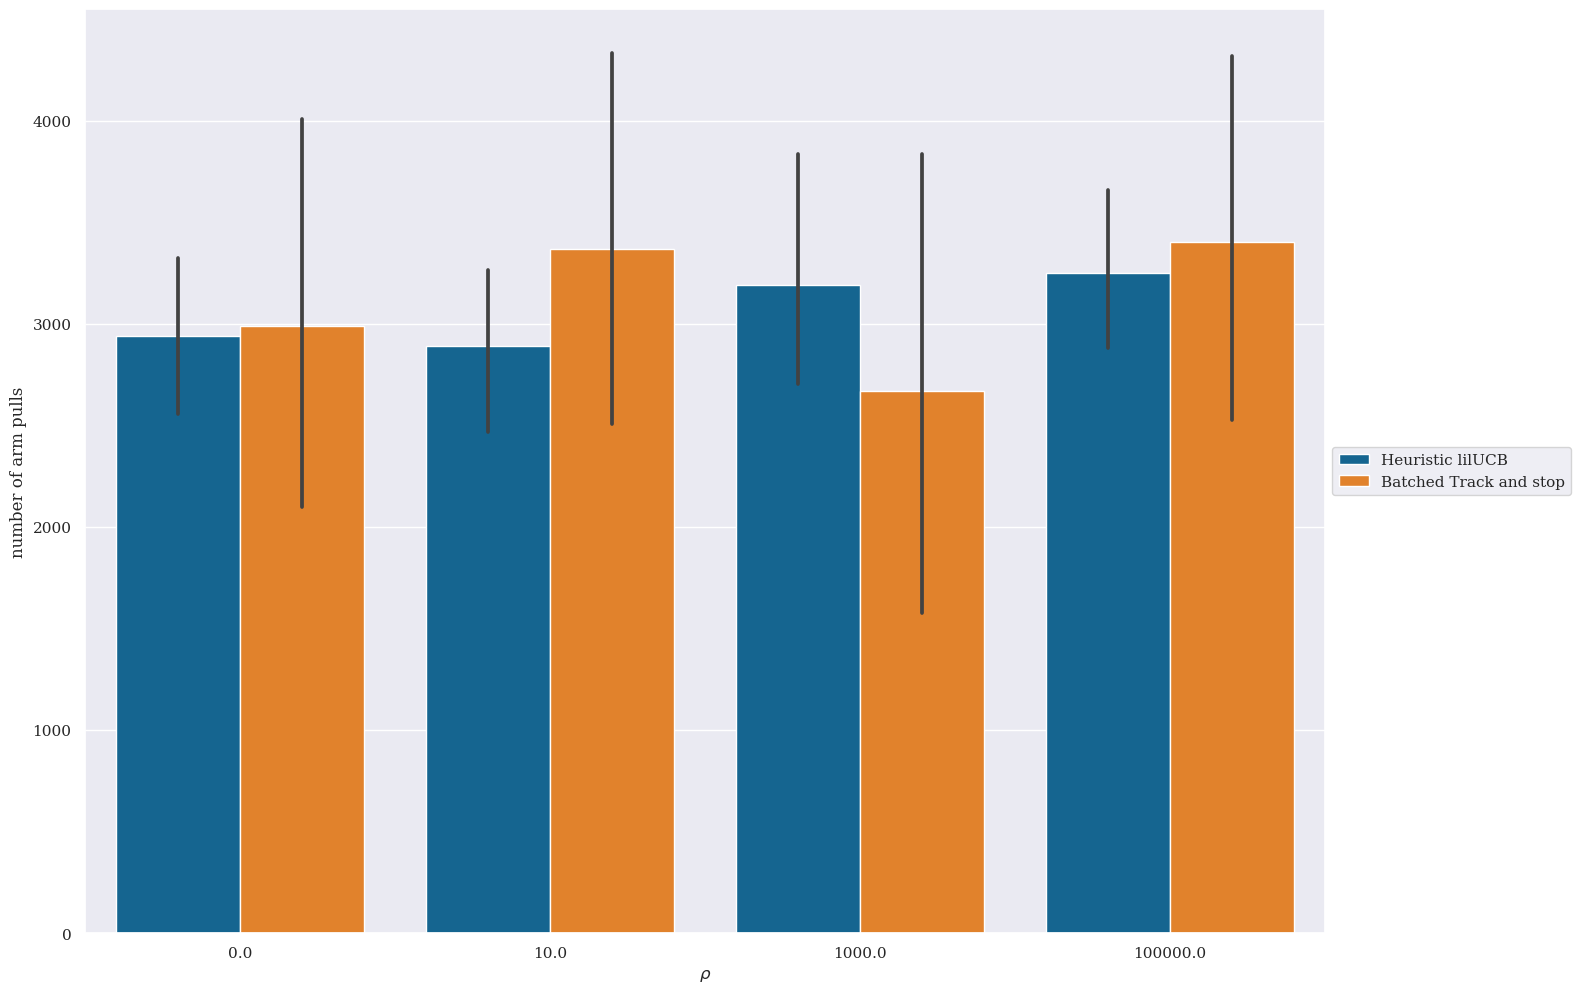

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='rho', y='total_actions', hue='learner', data=df)
plt.ylabel('number of arm pulls')
plt.xlabel(r'$\rho$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
# game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# # Start playing the game
# # Add `debug=True` for debugging purpose
# game.play(trials=trials, output_filename=temp_file.name)
rho= 1e3
gammas= [0, 1e1, 1e3, 1e5]
df = pd.DataFrame({})
for gamma in gammas:
    trials_df = pd.read_csv("csv_files/trial_df_rho_" + str(rho) + "_gamma_" + str(gamma) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['rho'] = rho
    trials_df['gamma'] =gamma
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_13518/2233544401.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_13518/2233544401.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_13518/2233544401.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(trials_df, ignore_index=True)
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_13518/2233544401.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,rounds,total_actions,regret,other,bandit,learner,confidence,rho,gamma,batch_size
75,531,4199,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,1000.0,100000.0,8
76,578,4479,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,1000.0,100000.0,8
77,309,2360,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,1000.0,100000.0,8
78,645,4904,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,1000.0,100000.0,8
79,646,4764,0.0,0.0,multi_armed_bandit,Batched Track and stop,0.99,1000.0,100000.0,8


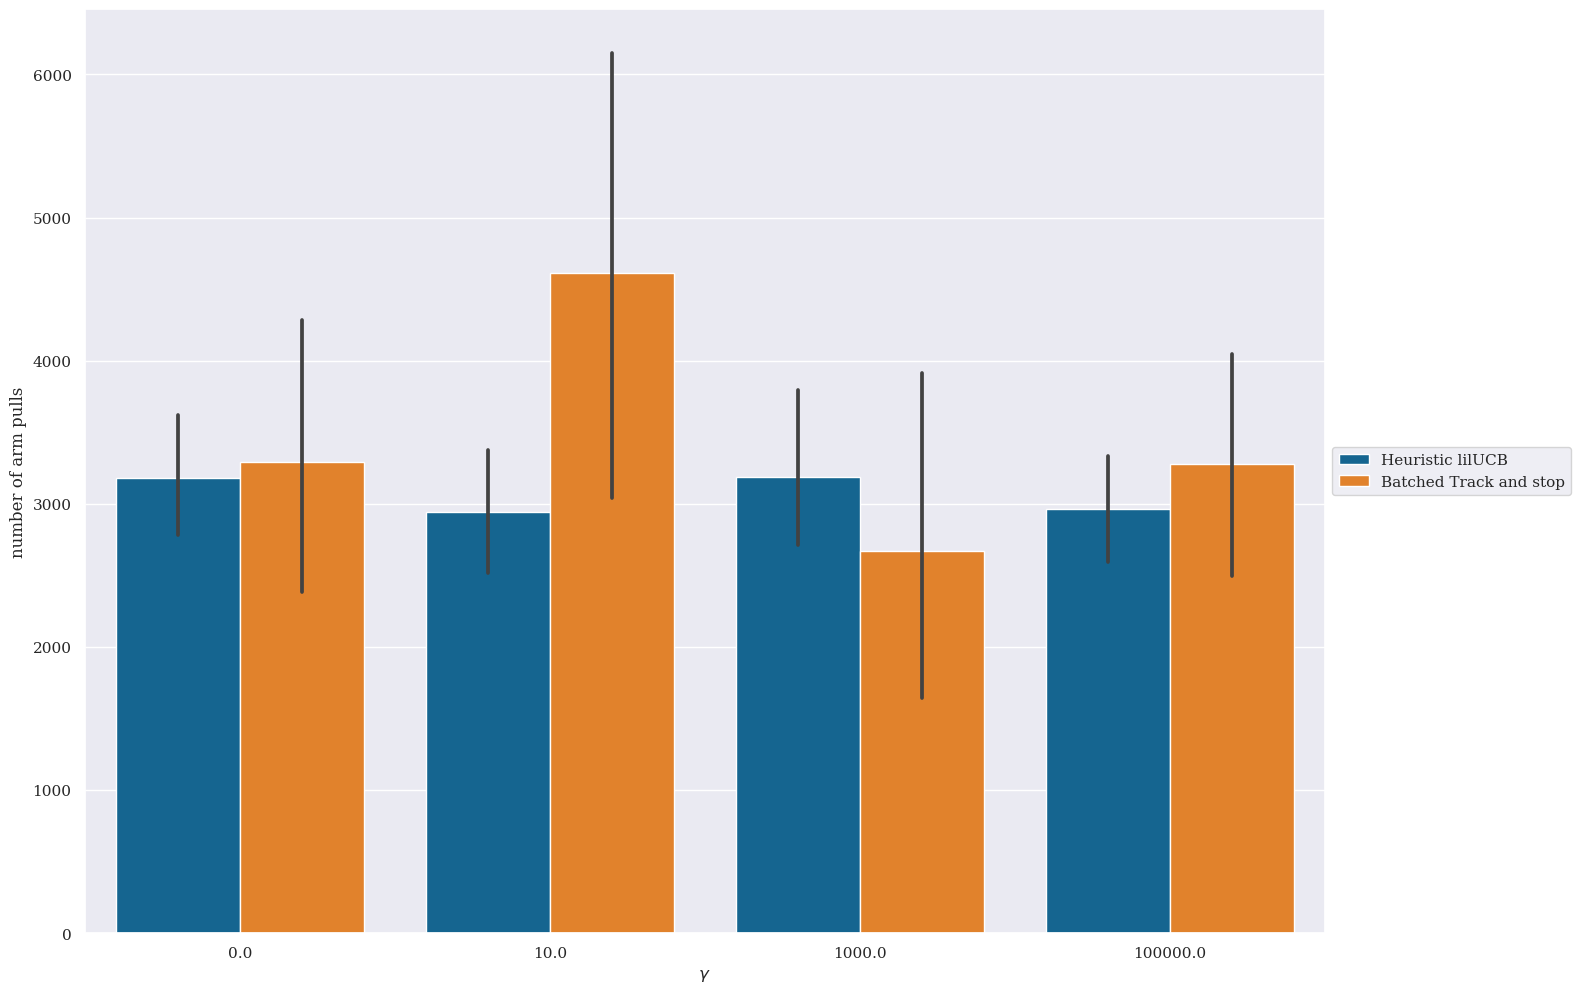

In [13]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='gamma', y='total_actions', hue='learner', data=df)
plt.ylabel('number of arm pulls')
plt.xlabel(r'$\gamma$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
rhos= [0, 1e1, 1e3]#, 1e5]
gammas= [1e1]#, 1e3, 1e5]
df = pd.DataFrame({})
for rho in rhos:
    trials_df = pd.read_csv("csv_files/trial_df_rho_" + str(rho) + "_gamma_" + str(gamma) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['rho'] = rho
    trials_df['gamma'] =gamma
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'csv_files/trial_df_rho_0_gamma_100000.0_.csv'

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
df_2_switches = df[df['num_switches'] == 2]
sns.barplot(x='num_switches', y='total_actions', hue='learner', data=df_2_switches)
plt.ylabel('number of arm pulls')
plt.xlabel(r'$max_{switches}$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
df_2_switches = df[df['num_switches'] == 1]
sns.barplot(x='num_switches', y='total_actions', hue='learner', data=df_2_switches)
plt.ylabel('number of arm pulls')
plt.xlabel(r'$max_{switches}$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
np.sum([4.99994482e-01, 5.00005518e-01, 1.66666667e-11, 1.66666667e-11,
 1.66666667e-11, 1.66666667e-11, 1.66666667e-11, 1.66666667e-11])